In [3]:
from sklearn import datasets

digits = datasets.load_digits()

In [7]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [8]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
digits.data
digits.images
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [13]:
digits.images.shape #จำนวนภาพ * ขนาดของภาพ

(1797, 8, 8)

In [14]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

2


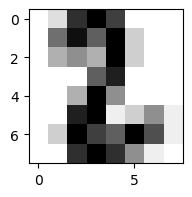

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(2,2))
im = digits.images[1600] # ภาพที่
label =digits.target[1600] # lable ภาพที่
print(label)
plt.imshow(im, cmap='gray_r')

In [23]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

# knn

In [36]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

0.9562289562289562
ตอบถูก 284 จากทั้งหมด 297


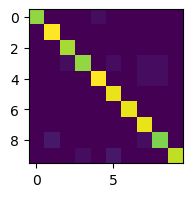

In [60]:
from sklearn.neighbors import KNeighborsClassifier  #โครงส้รางอังกอทั่วไป

clf = KNeighborsClassifier()
x_train =digits.data[:1500] #ภาพ : 0-1499 (ภาพที่ต้องถูก flatten เป็น 1มิติ => .data)
y_train =digits.target[:1500] # lable : 0-1499, : คือ ตัด
x_test =digits.data[1500:] # ภาพ: 1500-1796
y_test = digits.target[1500:] #lable : 1500-1796 (จำนวน 297)

clf.fit(x_train,y_train) #train (x =feature รูปภาพ, y label target) \ กระบวนการเกิดจากสองบรรทัดนี้
y_pred = clf.predict(x_test) #inference                                  \ กระบวนการเกิดจากสองบรรทัดนี้
#len(y_pred)

#y_test (คนตอบ) ทดสอบความแม่นยำของknn เทียบกับy_pred (คอมตอบ)
n_correct = sum(y_pred == y_test)  #จำนวนของtrue (จำนวนที่คอมตอบถูก)
accuracy = n_correct/len(y_test) #acc = จำนวนตอบถูก/จำนวนทั้งหมด
print(accuracy)
print('ตอบถูก',n_correct,'จากทั้งหมด',len(y_test))

#วาด confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(2,2))
plt.imshow(cm)

5
9


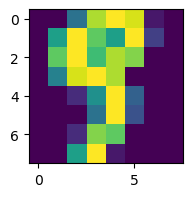

In [59]:
#y_pred == y_test ผิดที่ตัว54

print(y_pred[82])
print(y_test[82])
plt.figure(figsize=(2,2))
plt.imshow(digits.images[1582])

In [51]:
y_pred == y_test
for i in range(297):
    if y_pred[i] != y_test[i]:
        print(i)

53
73
82
105
106
111
158
160
162
166
227
265
290


In [61]:
cm

array([[26,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 31,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 27,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 26,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 31,  0,  0,  1,  1,  0],
       [ 0,  0,  0,  0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 30,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 30,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  1, 25,  0],
       [ 0,  0,  0,  1,  0,  2,  0,  0,  0, 28]], dtype=int64)